# *Project Name:  No-show appointments*

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dict">Data Dictionary</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>




<a id='intro'></a>
## **Introduction**
> ___context___

   This dataset contains information of over 100 thousand medical appointments collected in Brazil with questions aimed at whether patients do show up or not for their appointment.

> ___content___

110.527 medical appointments its 13 column variables. The most important one if the patient show-up or no-show to the appointment.


  > ___Case Question___
  
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
 
 
 
 
 
 
 
<a id='dict'></a>
### **Data Dictionary**

**PatientID** : Patient's identification Number

**AppointmentID**: Appointment's Identification number

**Gender**: Patient Sex (Male or Female) represented in M and F respectively

**ScheduledDay**: The day the patient set up appointment

**AppointmentDay**:The day of the appointment, when they will visit the doctor

**Age**: How old is the patience

**NeighbourHood**: Location where the appointment was made

**Scholarship**: Booleen, True or False; whether or not the patient is enrolled in Brasilian welfare 
program

**Hipertension**: True or False if the patient is hypertensive

**Diabetes**: True or False if patient is Diabetic

**Alcoholism**: True or False if patient is Alcoholic

**Handcap**: True or False if patient is Handicapped 

**SMS_received**: True or False if patient received atleast one SMS or not

**No-show**: True or False if no show for patient appointment. 1 if No show and 0 if patience show up.

......   *note 0 and 1 represent false and true respectively on the table*






In [1]:
## importing libraries
%matplotlib inline
%config inlineBackend.figure_format = 'retina'  ## to render higher image resolution

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config inlineBackend.figure_format = 'retina'  ## to render higher image resolution


<a id='wrangling'></a>
## Data Wrangling
in this session I will do a basic investigate of the data and get myself family with the parameters, load the data, get the data ready for cleansing and make sure the data is ready for analysis.

In [2]:
## loading the dataset using pandas and checking out the table.
df_noshow = pd.read_csv ('noshowappointments-kagglev2-may-2016.csv')
df_noshow.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
## Here I am checking for the properties of the data variable
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
## checking for possible duplicate

df_noshow.duplicated().any() ## no duplicates 

False

In [5]:
## perform basic statistic on the dataset to allow me explore the data summary
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
## displaying the unique values of each column
df_noshow.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
## exploring handcap column further
df_noshow['Handcap'].value_counts() ## handcap has a 5 unique values

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [8]:
## exploring age column further
df_noshow['Age'].describe()  ## Age shouldn't have a negative value

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

### information inferred from wrangling
_1) The data contains 110527 rows and 14 columns including the 'Row count' column._

_2) Dataset contains no null value._

_3) appointmentday and Scheduleday should be in date format._

_4) Data contains no duplicate value._

_5) Age column have inconsistent variable as its min value is negative._

_6) Some columns names are misspelt: handcap should be handicap and Hipertension should be hypertension._

_7) handcap has more than 2 unique values and it should be a booleen.( other column with values other than 0 and 1 will dropped)_ 

_8) SMS_received should be casted to booleen data type as it has just two variables(0,1)._

_9) appointmentID has all row value to be unique so it can be used reference key(Primary)._



## Data cleansing



I will be repairing the dataset as some inconsistencies have been revealed during the wrangling process. I will optimize dtype, remove useless columns that won't help our analysis and prepare the data for optimum analysis.








### Columns
-_Rename misspelt column_

-_Make all column names lowercase to be consistent_

-_Replace appointmentday and scheduledday to date_


In [9]:
# all column should fixed to lowercase for consistency
df_noshow.rename(columns=lambda x: x.lower(), inplace=True)
df_noshow.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [10]:
## correcting the misspelt column and renaming scheduledday and appointmentday to 'date'
df_noshow.rename(columns={'handcap': 'handicap', 'hipertension':'hypertension','scheduledday':'scheduleddate', 'appointmentday':'appointmentdate','no-show' : 'no_show'},inplace=True)
df_noshow.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduleddate',
       'appointmentdate', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

### Data Types
Convert scheduledate and appoinmentdate data type to datetime data

Convert any column that contains 1s and 0 data to boolean data

Convert No-show data to boolean data

In [11]:
## convert appointmentdate from string format to time format
df_noshow['appointmentdate'] = pd.to_datetime(df_noshow['appointmentdate'])

In [12]:
#convert scheduledday from string format to time format
df_noshow['scheduleddate'] = pd.to_datetime(df_noshow['scheduleddate'])

In [13]:
df_noshow.info() ## datetime implemented

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientid        110527 non-null  float64            
 1   appointmentid    110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduleddate    110527 non-null  datetime64[ns, UTC]
 4   appointmentdate  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

In [14]:
## converting the columns with 0s and 1s to a bool (0 = False and 1 = True)
df_noshow[['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']] = df_noshow[['scholarship', 'hypertension', 'diabetes',
                                                                                               'alcoholism', 'handicap', 'sms_received']].astype(bool)
df_noshow.columns
df_noshow[['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']].dtypes

scholarship     bool
hypertension    bool
diabetes        bool
alcoholism      bool
handicap        bool
sms_received    bool
dtype: object

### Data
Remove column that won't be needed in the analysis.

Remove any row with a negative age.

Replace any value larger than 1 in Handcap column with True. 

Remove time information in scheduled date and appointment date because it is missing from appointment date column.



In [15]:
## remove rows with -ve values in age column
index = df_noshow.query('age <= 0').index
df_noshow.drop(index, inplace=True)
df_noshow['age'].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

In [16]:
## dropping both patientID and AppointmentId because it won't be useful in my analysis
df_noshow.drop(['patientid', 'appointmentid'], axis = 1, inplace = True)

In [17]:
df_noshow ## patientid and appointmentid has been dropped

,gender,scheduleddate,appointmentdate,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,False,False,False,False,False,True,No
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,False,False,False,False,False,True,No
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,False,False,False,False,False,True,No
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,False,False,False,False,False,True,No


In [18]:
df_noshow.nunique()

gender                  2
scheduleddate      100307
appointmentdate        27
age                   102
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                2
sms_received            2
no_show                 2
dtype: int64

Before I proceed to EDA, I would like split up the 'scheduleddate' and 'appointmentdate' into Date, month, Weekday and evaluate the waiting day(where; waitingdays = appointmentday - scheduledday). 

___Logically appointmentdate should come after scheduleddate___

In [19]:
# Get month and week of day information from dates
df_noshow['appointmentweekday'] = pd.to_datetime(df_noshow.appointmentdate).dt.day_name()
df_noshow['appointmentmonth'] = pd.to_datetime(df_noshow.appointmentdate).dt.month_name()

In [20]:
df_noshow['scheduleddate'] = df_noshow['scheduleddate'].dt.date
df_noshow['appointmentdate'] = df_noshow['appointmentdate'].dt.date

In [22]:
df_noshow.head() ## Date & time column is cleaned to just date specific ***

,gender,scheduleddate,appointmentdate,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointmentweekday,appointmentmonth
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No,Friday,April
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No,Friday,April
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No,Friday,April
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No,Friday,April
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No,Friday,April


In [23]:
## waitingdays is the number of days between appointmentdate and scheduleddate *keep it in date format
df_noshow['waitingdays'] = (df_noshow['appointmentdate'] - df_noshow['scheduleddate']).dt.days

In [24]:
## inspecting the waitingdays for any abnormalities

df_noshow['waitingdays'].describe() 

## the waiting days shouldn't have a -ve value and the minimum value is -6

count    106987.000000
mean         10.166721
std          15.263508
min          -6.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: waitingdays, dtype: float64

In [25]:
### eliminating waitingdays that have value less than zero by only considering only values >= 0

df_noshow = df_noshow[df_noshow['waitingdays'] >= 0 ]

In [26]:
df_noshow['waitingdays'].describe() ## no more negative values in waiting days column

count    106982.000000
mean         10.167290
std          15.263631
min           0.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: waitingdays, dtype: float64

In [27]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   gender              106982 non-null  object
 1   scheduleddate       106982 non-null  object
 2   appointmentdate     106982 non-null  object
 3   age                 106982 non-null  int64 
 4   neighbourhood       106982 non-null  object
 5   scholarship         106982 non-null  bool  
 6   hypertension        106982 non-null  bool  
 7   diabetes            106982 non-null  bool  
 8   alcoholism          106982 non-null  bool  
 9   handicap            106982 non-null  bool  
 10  sms_received        106982 non-null  bool  
 11  no_show             106982 non-null  object
 12  appointmentweekday  106982 non-null  object
 13  appointmentmonth    106982 non-null  object
 14  waitingdays         106982 non-null  int64 
dtypes: bool(6), int64(2), object(7)
memory usage: 8.8+ 

In [28]:
df_noshow['no_show'].describe()

count     106982
unique         2
top           No
freq       85307
Name: no_show, dtype: object

In [29]:
df_noshow['no_show'].replace(['Yes', 'No'], [1,0],inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


<a id='eda'></a>
## Exploratory Data Analysis and Visualization.

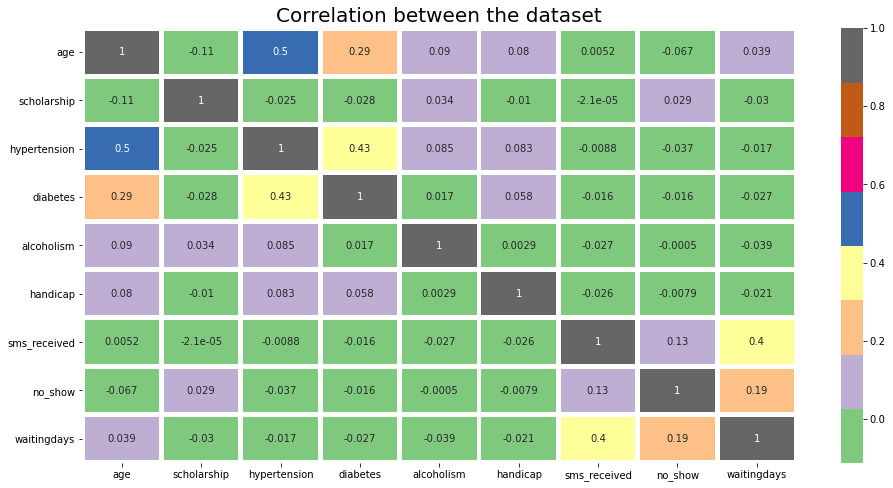

In [30]:
## looking for correlation among variables relative to 'no_show' using heatmap.

plt.figure(figsize=(16,8))
sns.heatmap(df_noshow.corr(), annot=True,linewidth=4, cmap= 'Accent')
plt.title('Correlation between the dataset', fontsize=20)
plt.show()

The heatmap shows that there is a strong correlation between 'waitingdays and no_show', 'sms_received and no_show', a slight correlation between 'scholarship and no-show' and how diabetes and hypertension correlate with patient not showing up for appointment. 

This heatmap will help me streamline my exploration by digging deeper into how waitingdays, sms reminder, scholarship, diabetes and hypertension affect how patience show up for appointment.

I will also look into other factors that heatmap cannot correlate because of the datatype attributed to the column such as gender.

Text(0, 0.5, 'No of patients')

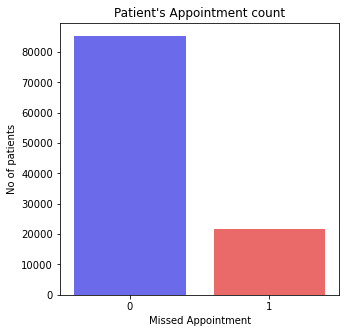

In [31]:
## it is important to check for the overall count of patient that show up

plt.figure(figsize=(5,5))
sns.countplot(x = "no_show", data = df_noshow, palette = 'seismic')
plt.title("Patient's Appointment count")
plt.xlabel("Missed Appointment")
plt.ylabel("No of patients")




In [32]:
## count number of Patients data didn't showed up
no_show_up = df_noshow[df_noshow["no_show"]==1].count()["no_show"] 

no_show_up

21675

In [33]:
## count total number of Patients that showed up
show_up =  df_noshow[df_noshow["no_show"]==0].count()["no_show"]
show_up

85307

Text(0.5, 1.5, "Percentage of patients who show up and didn't show up for appointment")

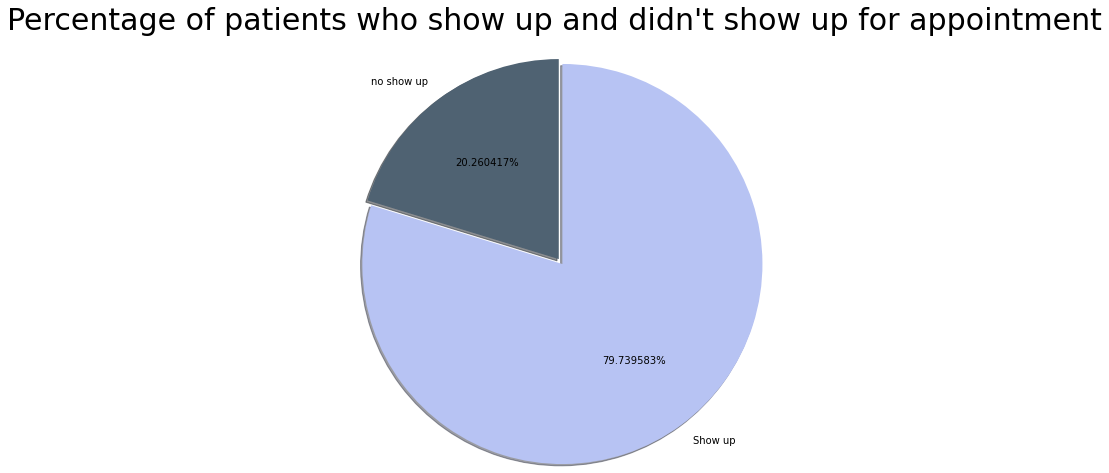

In [72]:
## A pie chart that shows percentage of patients that showed up and don't show up for appointment

data = [no_show_up,show_up]
label1 = ["no show up","Show up"]
colors = ['#4F6272', '#B7C3F3']
plt.axis('equal')
explode = [-0.08, 0.15]
plt.pie(data,labels=label1,radius= 2.3,shadow=True,explode=explode,colors = colors, autopct='%1f%%',startangle=90,textprops = {"fontsize":10, "color" :'Black'})
plt.title("Percentage of patients who show up and didn't show up for appointment",y=1.5, fontsize = 30) 

Overall 79.7% patient show up for there appointment and 20.3% didn't show up for appointment.

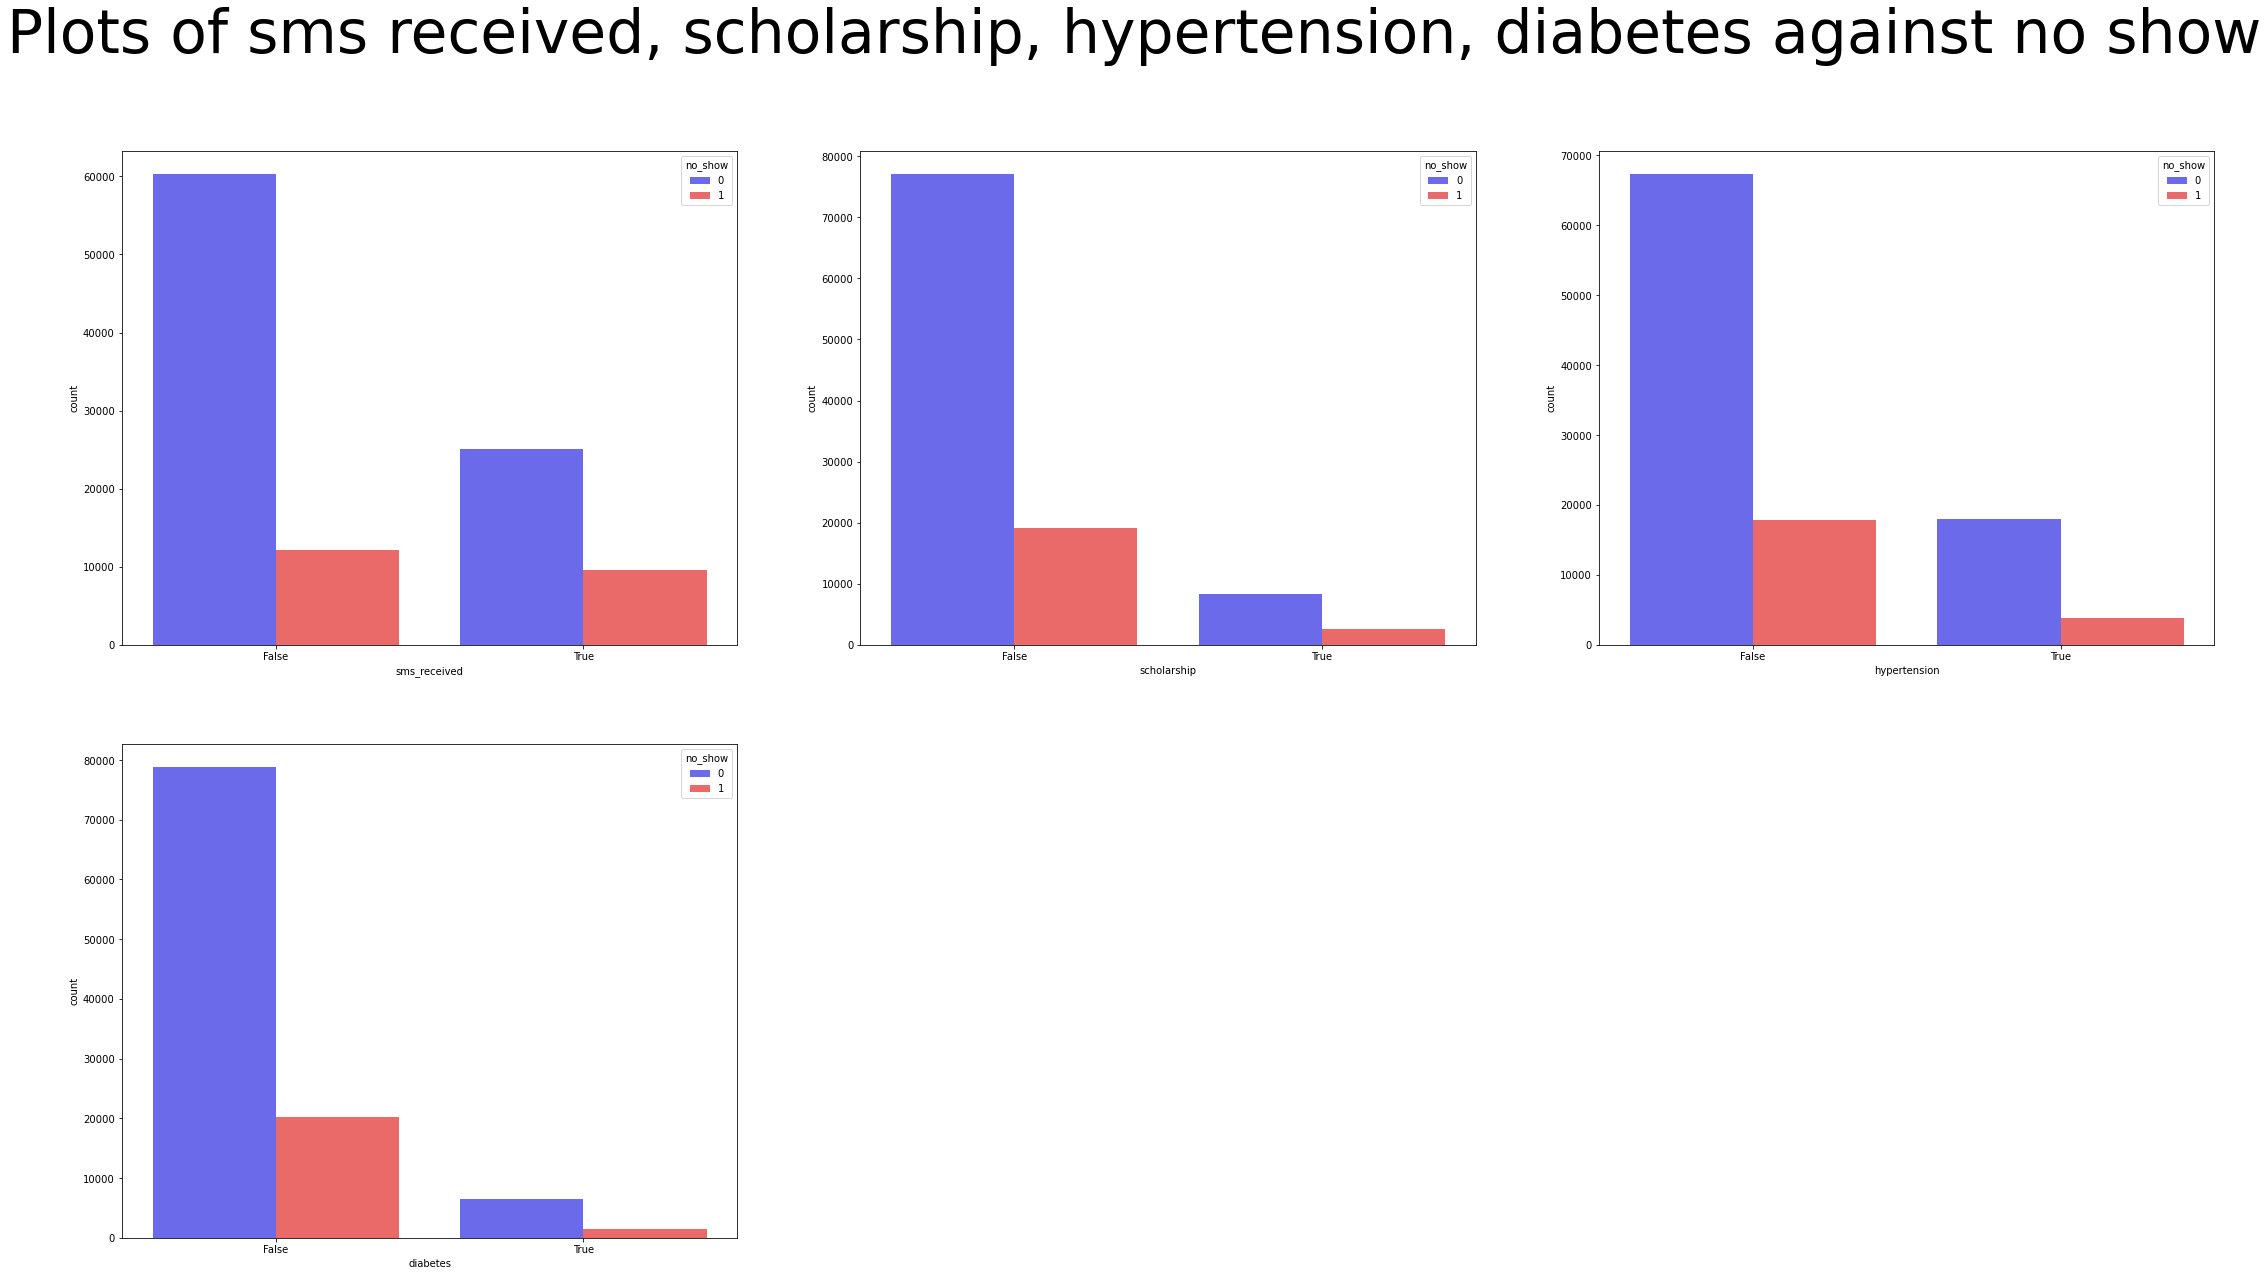

In [61]:
## further visualization on scholarship, hypertension, diabetes

def get_bar_chart(df_noshow):
    column = ['sms_received','scholarship','hypertension', 'diabetes']
    list(enumerate(column))
    plt.figure(figsize=(37.5,20))
    for i in enumerate(column):
        plt.subplot(2, 3, i[0]+1)
        sns.countplot(x=i[1], hue= 'no_show' ,data=df_noshow, palette = 'seismic')
    plt.suptitle('Plots of sms received, scholarship, hypertension, diabetes against no show', fontsize = 60, horizontalalignment = 'center')
    plt.show()
    
get_bar_chart(df_noshow) 


__Question 1

How does SMS reminder affect the turn up of patient for there appointment?

In [63]:
## count of patients that received sms
sms_yes = df_noshow[df_noshow["sms_received"]==1].count()["sms_received"]

sms_yes

34585

In [64]:
## count of patients that didn't receive sms
sms_no = df_noshow[df_noshow["sms_received"]==0].count()["sms_received"] 

sms_no

72397

<function matplotlib.pyplot.show(close=None, block=None)>

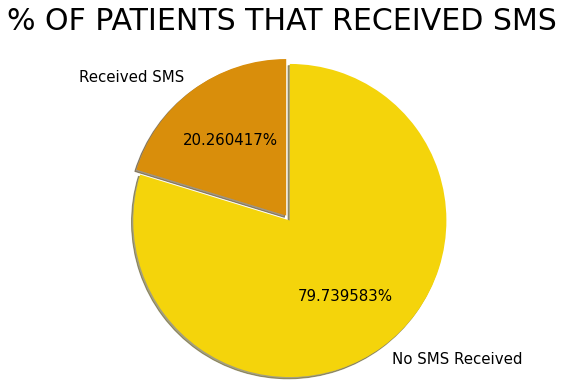

In [68]:
## piechart showing the % of sms received
data2 = [sms_yes,sms_no]
label1 = ["Received SMS","No SMS Received"]
colors = ['#D98E0B', '#F4D40B']
plt.axis('equal')
explode = [-0.08, 0.15]
plt.pie(data,labels=label1,radius= 1.8,shadow=True,explode=explode,colors = colors, autopct='%1f%%',startangle=90,textprops = {"fontsize":15})
plt.title('% OF PATIENTS THAT RECEIVED SMS',y=1.3, fontsize = 30)
plt.show

The % of patient that received sms atleast once is 20.3%

The % of patient that didn't received sms is 79.7%



To further understand how each sms categories affect patients showing up

In [77]:
## for the purpose of this chart I will convert sms_received to int datatype
df_noshow = df_noshow.astype({'sms_received':'int'})
print(df_noshow.dtypes)

gender                object
scheduleddate         object
appointmentdate       object
age                    int64
neighbourhood         object
scholarship             bool
hypertension            bool
diabetes                bool
alcoholism              bool
handicap                bool
sms_received           int32
no_show                int64
appointmentweekday    object
appointmentmonth      object
waitingdays            int64
dtype: object


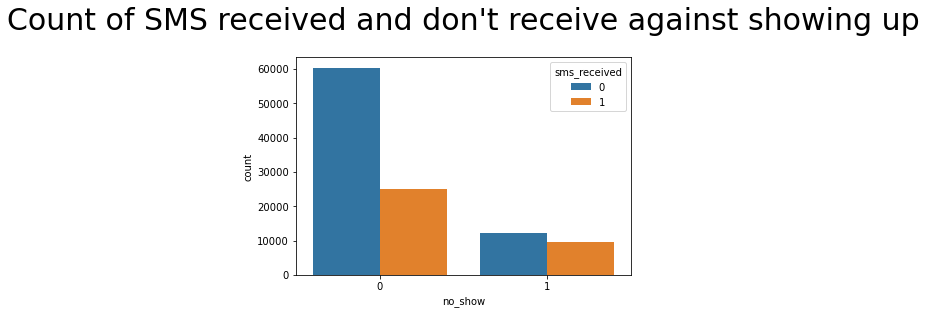

In [85]:
## the chart is showing how each category of sms_received show up for appointment

sms_show = sns.countplot(x=df_noshow.no_show, hue=df_noshow.sms_received, data=df_noshow)
sms_show.set_title("", size='20')
plt.title("Count of SMS received and don't receive against showing up",y=1.1, fontsize = 30, horizontalalignment = 'center')
plt.show()

This chart shows that the sms reminder is positively correlated with 'not showing up'. The % of people who show up and didn't receive sms reminder are more than the % people who received sms and show up.

__Question 2:

How does gender affect showing up for appointment?

In [250]:
## gender count
gender_count = df_noshow.groupby('gender').count()['no_show']
gender_count

gender
F    70115
M    36867
Name: no_show, dtype: int64

In [253]:
## the count of male and female for showin g up and not
gender_show = df_noshow[['gender','no_show']].value_counts()

gender_show

gender  no_show
F       0          55843
M       0          29464
F       1          14272
M       1           7403
dtype: int64

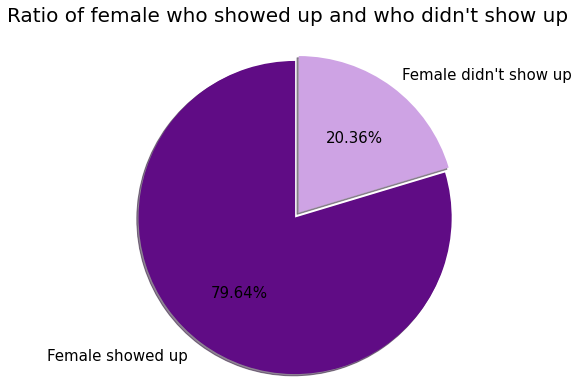

In [269]:
## a piechart that illustrate the % ratio of female(F) that show up and not

female_ratio = (gender_show['F']/gender_count['F'])*100 # this to calculate with precenatage female that showed up and dont.
label2 = ['Female showed up ', "Female didn't show up"]
colors = ['#600c85', '#cea3e4']
plt.axis('equal')
explode = [-0.08, 0.15]
plt.pie(female_ratio, radius=1.8, shadow=True ,labels = label2, explode=explode,colors = colors ,startangle=90,
        autopct='%0.2f%%',textprops = {"fontsize":15, "fontname":"Bodoni Ornaments"})
plt.title("Ratio of female who showed up and who didn't show up ",fontsize=20, y=1.4, fontname=' Arial Black') 
plt.show()


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


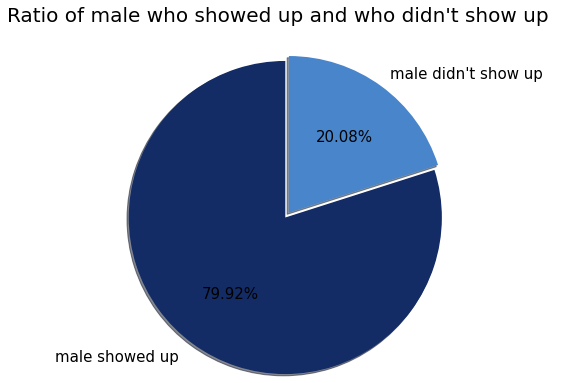

In [271]:
## a piechart that illustrate the % ratio of male(M) that show up and not

male_ratio = (gender_show['M']/gender_count['M'])*100 # this to calculate with pecenatage male that showed up and dont.
label2 = ['male showed up ', "male didn't show up"]
colors = ['#142c66', '#4985ca']
plt.axis('equal')
explode = [-0.08, 0.15]
plt.pie(male_ratio, radius=1.8, shadow=True ,labels = label2, explode=explode,colors = colors ,startangle=90,
        autopct='%0.2f%%',textprops = {"fontsize":15, "fontname":"Bodoni Ornaments"})
plt.title("Ratio of male who showed up and who didn't show up ",fontsize=20, y=1.4, fontname= 'Arial Black') 
plt.show()


the gender by itself doesn't have an effect on whether a patient will show up or not as they both share the same 'no show' ratio which is close in value with the total 'show up' % of all patience.

<a id='conclusions'></a>
## Conclusions

. The observation with SMS reminder is that, it didn't affect the rate of showing up for patients as the rate of showing up reduces with sms reminder.

. scholarship is also a major factor in this dataset, the scholarship doesn't guarantee a patient will show up.

. The gender of patients does not have any effect on whether the patient will show up. Each gender shares the same show up distribution with the total percentage.

# Limitation

. All anaysis conclusion are based on the data collected from kaggle.

. Data were only collected from patient in Brazil and outcome could differ in other countries.

. Only data from 81 Hospitals in brazil was used.

. The Result of the analysis tentative since the data used are limited.